PRACTICA: ANÁLISIS Y LA GESTIÓN DE RIESGOS NATURALES



Importamos las librerias

In [1]:
# Importamos las librerias
!pip install mapclassify
import pandas as pd
import geopandas as gpd
import shapely
from shapely import wkt
import matplotlib.pyplot as plt
import mapclassify
print('Librerias Importadas')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.6 MB/s eta 0:00:00
Librerias Importadas


Conectamos el cuaderno actual con nuestro Drive

In [2]:
# Conectamos el cuaderno actual con nuestro Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cargamos los shapefiles para el analisis

In [3]:
## Cargar un Shapefile de Distritos
distritos = gpd.read_file('/content/drive/MyDrive/Capacitacion/Proyectos/Riesgo/Distrital.zip')

In [4]:
# Cargar un Shapefile block de la Ciudad de Ica
manzana = gpd.read_file('/content/drive/MyDrive/Capacitacion/Proyectos/Riesgo/Manzanas_Poblacion.zip')

In [5]:
#Cargar un shapefile: Red Hidrografica
rio = gpd.read_file('/content/drive/MyDrive/Capacitacion/Proyectos/Riesgo/Hidrografia.zip')

Visualizamos la informacion cargada

<Axes: >

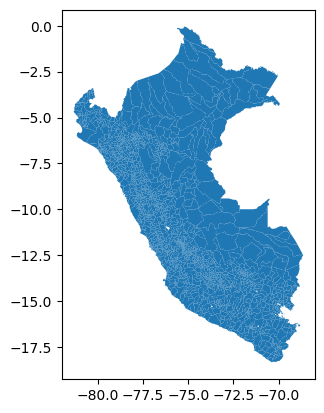

In [6]:
distritos.plot()

In [7]:
# Filtrar Ica
ica = distritos[distritos['PROVINCIA'] == 'ICA']

<Axes: >

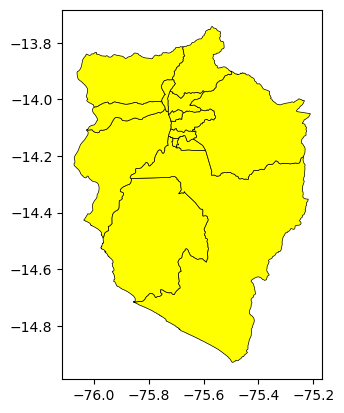

In [8]:
# Plotear la capa ica de color amarillo y bordes negro
ica.plot(color='yellow', edgecolor='black', linewidth=0.5)

<Axes: >

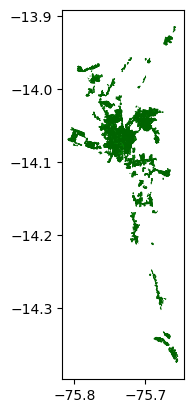

In [9]:
# Plotear la capa manzanas de color verde y borde verde oscuro
manzana.plot(color='green', edgecolor='darkgreen', linewidth=0.5)

<Axes: >

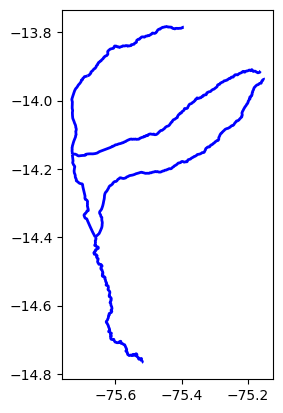

In [10]:
# Plotear la capa rio de color azul y borde grueso
rio.plot(color='blue', edgecolor='black', linewidth=2)

In [11]:
# Verificacion de la proyeccion de las capas
print(manzana.crs)
print(rio.crs)
print(ica.crs)

EPSG:4326
EPSG:4326
EPSG:4326


## **Analisis de Gestion de Riesgos**

Interpretacion: EL rio Ica presenta subidas en el caudal causando un desborde de su caudal cuando las lluvias se intensifican. La quincena de febrero las lluvias alcanzaron 14 mm/día afectando a la poblacin e infraestructura

In [12]:
# Crear un campo de valores unicos
manzana['ID_UNICO'] = range(1, len(manzana) + 1)

In [14]:
#Generamos un buffer de 200 metros de la capa rio, la capa se encuentra en grados, tenemos que convertirlo en metros.
rio_buffer = rio.buffer(0.0018000018000018)

<ipython-input-14-9ecf5ea5a687>:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  rio_buffer = rio.buffer(0.0018000018000018)


<Axes: >

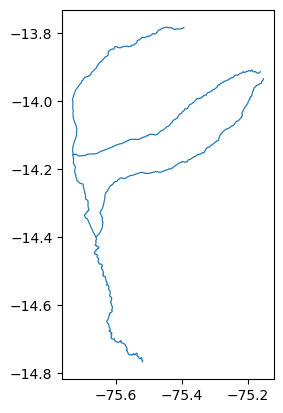

In [15]:
rio_buffer.plot()

<Axes: >

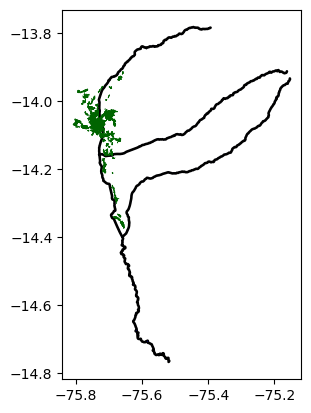

In [16]:
#Plotear las dos capas: mz y gdb_cubierta
ax = rio_buffer.plot(color='blue', edgecolor='Black')
manzana.plot(ax=ax,color='green', edgecolor='darkgreen', linewidth=0.5)

In [17]:
m = manzana.explore(color='green', edgecolor='darkgreen', linewidth=0.5)
rio_buffer.explore(m=m,color='blue', edgecolor='Black')

Output hidden; open in https://colab.research.google.com to view.

Identificar las manzanas afectadas

In [18]:
def intersectar(manzana, rio_buffer):
    # Convert rio_buffer to a GeoDataFrame
    rio_buffer = gpd.GeoDataFrame(geometry=rio_buffer, crs=rio.crs)
    manzana_afectada = gpd.overlay(rio_buffer, manzana, how='intersection')
    if manzana_afectada.empty:
        print("No existe manzanas afectadas por el desborde del rio")
        return None
    return manzana_afectada
    print("No exite manzanas afectadas por el desborde del rio")

In [19]:
manzana_afectada = intersectar(manzana, rio_buffer)

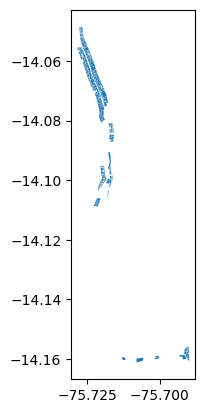

In [20]:
# Visualizar el GeoDataFrame resultante (opcional)
if manzana_afectada is not None:
    manzana_afectada.plot()

In [21]:
manzana_afectada.sample()

,UBIGEO,CODCCPP,ZONA,MANZANA_ID,MANZANA_A,T_TOTAL,T_HOMBRES,T_MUJERES,NOMBDEP,NOMBPROV,IDPROV,ID_UNICO,geometry
162,110101,0001,01700,006,None,142.0,67.0,75.0,ICA,ICA,1101,2934,"POLYGON ((-75.72423 -14.06229, -75.72404 -14.0..."


Manzanas no afectadas

In [26]:
#Crear una lista con la capa manzana_afectada y que me muestre un solo campo
manzana_afectada_lista = manzana_afectada['ID_UNICO']

In [27]:
manzana_afectada_lista[:5]

,ID_UNICO
0,472
1,810
2,1116
3,1215
4,1510


In [28]:
#Selecionar los registros de la tabla manzana exexto los registros de la lista manzana_afectada_lista
manzana_no_afectada = manzana[~manzana['ID_UNICO'].isin(manzana_afectada_lista)]

In [29]:
manzana_no_afectada.explore()

Output hidden; open in https://colab.research.google.com to view.

In [30]:
# Analisis de la poblacion afectada
poblacion_afectada = manzana_afectada[['T_TOTAL','T_HOMBRES','T_MUJERES']].sum() # Changed tuple to list
print("Poblacion afectada de Mujeres por el desborde del rio:", poblacion_afectada['T_TOTAL'])
print("Poblacion afectada de Hombres  desborde del rio:", poblacion_afectada['T_HOMBRES'])
print("Poblacion afectada Total por el desborde del rio:", poblacion_afectada['T_MUJERES'])

Poblacion afectada de Mujeres por el desborde del rio: 29994.0
Poblacion afectada de Hombres  desborde del rio: 14454.0
Poblacion afectada Total por el desborde del rio: 15540.0


<ipython-input-37-fe52032723d7>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


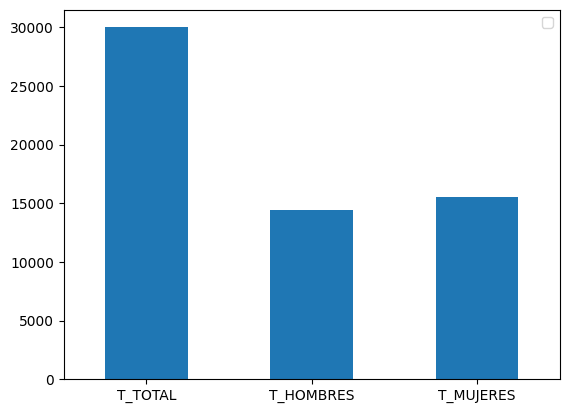

In [37]:
# Generar un grafico de la capa manzana_afectada, de los campos 'T_TOTAL','T_HOMBRES','T_MUJERES', indicar los valores totales en el grafico
poblacion_afectada[['T_TOTAL','T_HOMBRES','T_MUJERES']].plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.legend(loc='upper right')

Visualizacion de las manzanas afectadas

In [36]:
!pip install folium
import folium

# Assuming 'm_combinado' is the intended map object
m_combinado2 = folium.Map() # Initialize m_combinado2 as a folium.Map object

# Crear el mapa centrado en la primera geometría de manzana_afectada (puedes ajustar el centro según sea necesario)
center = [manzana_afectada.geometry.centroid.y.iloc[0], manzana_afectada.geometry.centroid.x.iloc[0]]
m_combinado2 = folium.Map(location=center, zoom_start=14)

# Agrega la capa rio_buffer
folium.GeoJson(
    rio_buffer,
    name='Rio Buffer',  # Asigna un nombre a la capa
    style_function=lambda x: {'color': 'blue', 'fillOpacity': 0.4, 'fillColor': 'blue','weight':1}
).add_to(m_combinado2)

# Agrega la capa manzana
folium.GeoJson(
    manzana_no_afectada,
    name='manzana no Afectada',  # Asigna un nombre a la capa
    style_function=lambda x: {'color': 'Black', 'fillOpacity': 0.4, 'fillColor': 'orange','weight':0.5}
).add_to(m_combinado2)

# Agrega la capa manzana_afectada
folium.GeoJson(
    manzana_afectada,
    name='Manzana Afectada',
    style_function=lambda x: {'color': 'red','fillOpacity': 0.4,'fillColor': 'red','weight':0.8},
    popup=folium.GeoJsonPopup(fields=['T_TOTAL', 'T_HOMBRES', 'T_MUJERES']) # Campos a mostrar en el popup
).add_to(m_combinado2)

# Agrega un control de capas para activar/desactivar capas
#folium.LayerControl().add_to(m_combinado)
folium.TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr='Esri', # Attribution for Esri tile layer
    name='Esri Satellite',
    overlay=True,
    control=True

).add_to(m_combinado2)
#m
# Mostrar el mapa
folium.LayerControl().add_to(m_combinado2)

m_combinado2

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Exportar la capa gaps_explotado como un shapefile
#Gaps_identificados=gaps_explotado.to_file('/content/drive/MyDrive/Capacitacion/Proyectos/Topologia/Gaps/Gaps_Identificado.shp')